<a href="https://colab.research.google.com/github/vaishakh-v/ML/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import Model 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
collection = "/content/drive/MyDrive/ML-ChakGo_Scan/imgs/"

# public url: https://drive.google.com/drive/folders/1GTCZ1lGjCFnUursejAOqYLMaFUJhKUt0?usp=sharing
# Dataset inside the imgs folder

In [ ]:
image_size = (224, 224)
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    collection,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    collection,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 229 files belonging to 2 classes.
Using 184 files for training.
Found 229 files belonging to 2 classes.
Using 45 files for validation.


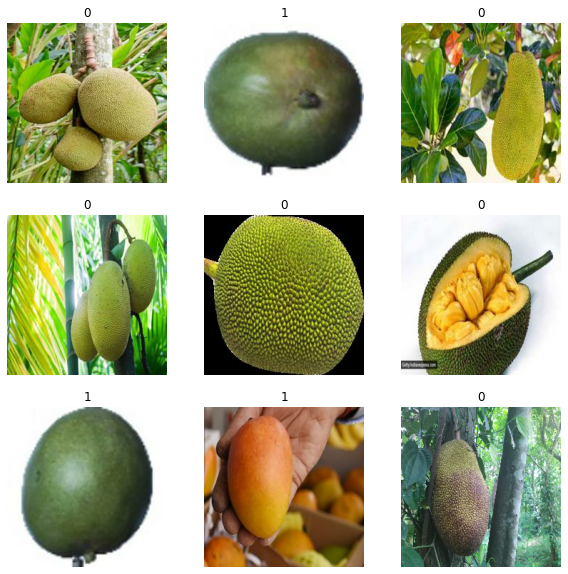

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.Rescaling(1.0/255.0)
    ]
)

In [ ]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, 
weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
vgghist = model.fit(augmented_train_ds, validation_data = val_ds, steps_per_epoch = 12, epochs = 10)

Epoch 1/10
12/12 [==============================] - 117s 10s/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.9510 - val_acc: 0.9778
Epoch 2/10
12/12 [==============================] - 117s 10s/step - loss: 0.0040 - acc: 1.0000 - val_loss: 1.2696 - val_acc: 0.9778
Epoch 3/10
12/12 [==============================] - 117s 10s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.9780 - val_acc: 0.9778
Epoch 4/10
12/12 [==============================] - 117s 10s/step - loss: 0.0265 - acc: 0.9946 - val_loss: 1.3254 - val_acc: 0.9778
Epoch 5/10
12/12 [==============================] - 117s 10s/step - loss: 7.4973e-04 - acc: 1.0000 - val_loss: 0.8246 - val_acc: 0.9778
Epoch 6/10
12/12 [==============================] - 117s 10s/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.9435 - val_acc: 0.9778
Epoch 7/10
12/12 [==============================] - 117s 10s/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6833 - val_acc: 0.9778
Epoch 8/10
12/12 [==============================] - 117s 10s/step - loss

In [ ]:
img = keras.preprocessing.image.load_img(
    "/content/1_100.jpg", target_size=image_size
)
#img = layers.experimental.preprocessing.Rescaling(1.0 / 255)(img)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(score)
print(
    "This image is %.2f percent Chakka and %.2f percent Manga."
    % (100 * (1 - score), 100 * score)
)
if (100*score > 90 ):
  print("This is a MANGA")
elif (100*score < 10):
  print("This is a CHAKKA")
else:
  print("Sorry, I cannot identify this fruit")

[0.]
This image is 100.00 percent Chakka and 0.00 percent Manga.
This is a CHAKKA


In [ ]:
model.save('/content/drive/MyDrive/ML-ChakGo_Scan/MODEL-TRAINED-NEW'

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML-ChakGo_Scan/MODEL-TRAINED-NEW/assets
